In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
import numpy.random as rnd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [8]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [9]:
rnd.seed(42)

In [10]:
data=pd.read_csv('./Dataset for the project/housing.csv')

In [11]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [13]:
Ocean Proximity is a categorical variable. Let's see what values it contain.

SyntaxError: invalid syntax (<ipython-input-13-95aa3ea8efda>, line 1)

In [14]:
print('Ocean Proximity is a categorical variable. Let's see what values it contain.')

SyntaxError: invalid syntax (<ipython-input-14-d7d74070500f>, line 1)

In [15]:
# Ocean Proximity is a categorical variable. Let's see what values it contain.

In [16]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [17]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266ACC8F4E0>,
      dtype=object)

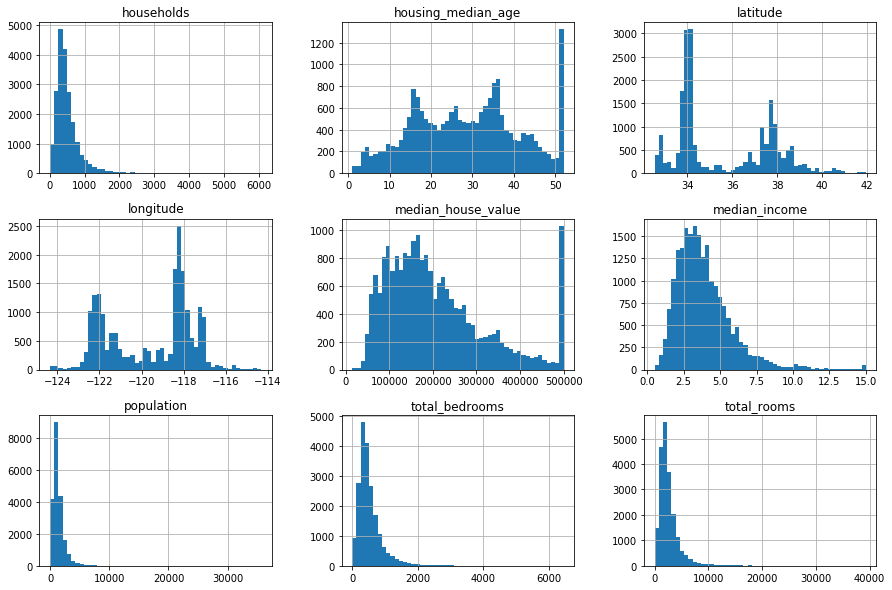

In [18]:
data.hist(bins=50,figsize=(15,10))

In [19]:
data['income_cat']=np.ceil(data['median_income']/1.5)
data['income_cat'].where(data['income_cat']<5,5.0,inplace=True)

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data['income_cat']):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

In [21]:
strat_train_set.drop('income_cat',axis=1,inplace=True)
strat_test_set.drop('income_cat',axis=1,inplace=True)

In [22]:
strat_train_set.to_csv("strat_train_set.csv",index=False)
strat_test_set.to_csv("strat_test_set.csv",index=False)

In [23]:
data=pd.read_csv('strat_train_set.csv')
#data.drop('Unnamed: 0',axis=1,inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null int64
total_rooms           16512 non-null int64
total_bedrooms        16354 non-null float64
population            16512 non-null int64
households            16512 non-null int64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
median_house_value    16512 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


Text(0.5, 1.0, 'Distribution of households')

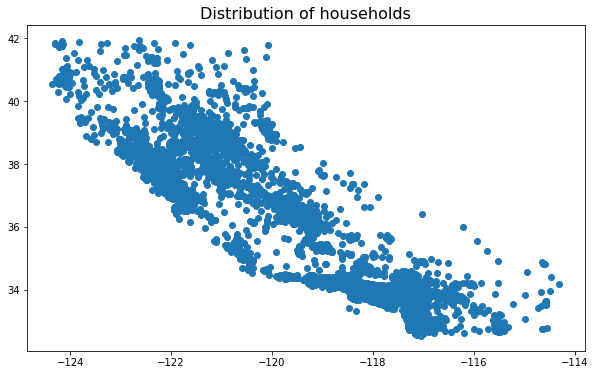

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'])
plt.title("Distribution of households",size=16)

Text(0.5, 1.0, 'Distribution of households')

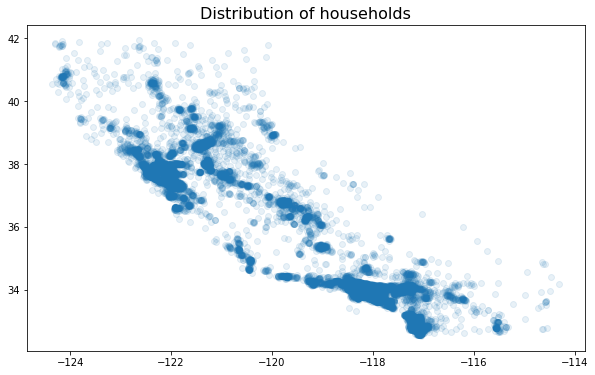

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.1)
plt.title("Distribution of households",size=16)

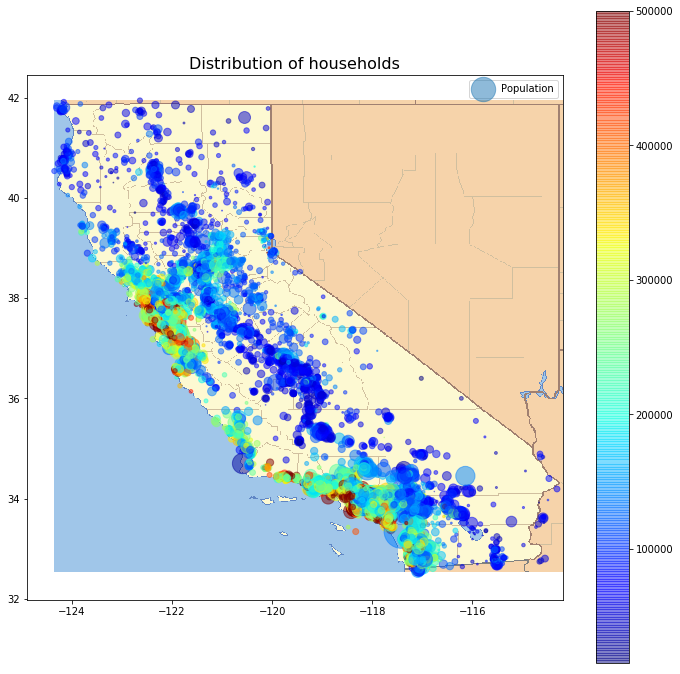

In [27]:
plt.figure(figsize=(12,12))
img=plt.imread('california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.5,s=data['population']/30,c=data['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

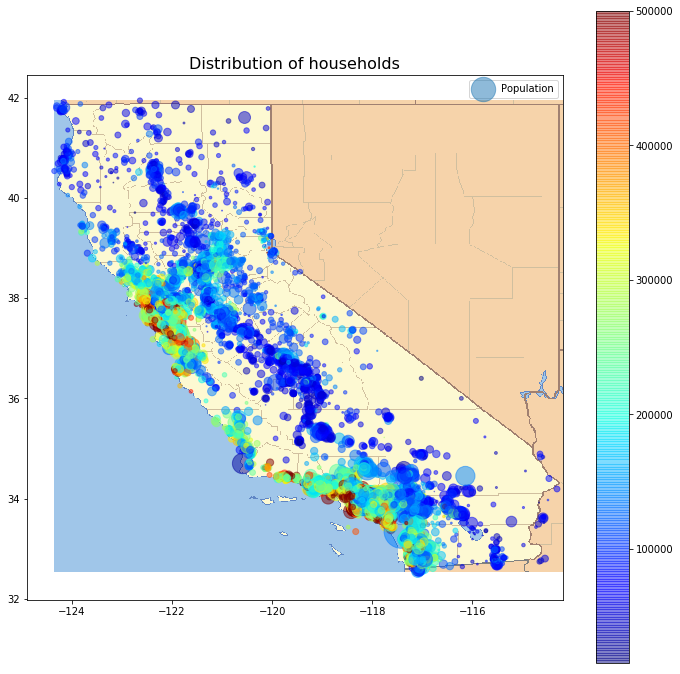

In [28]:
plt.figure(figsize=(12,12))
img=plt.imread('california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.5,s=data['population']/30,c=data['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

In [29]:
corr_matrix=data.corr()

In [30]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

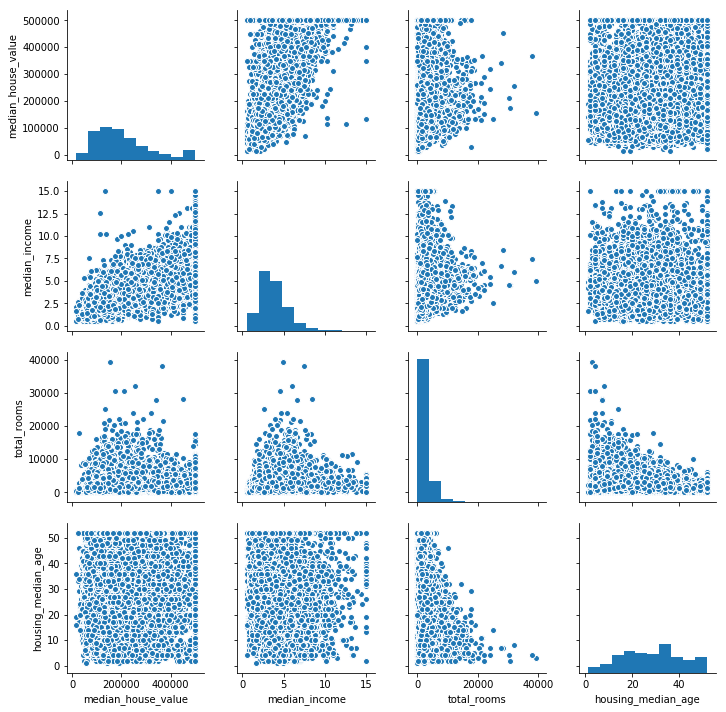

In [31]:
sns.pairplot(data[['median_house_value','median_income','total_rooms','housing_median_age']])

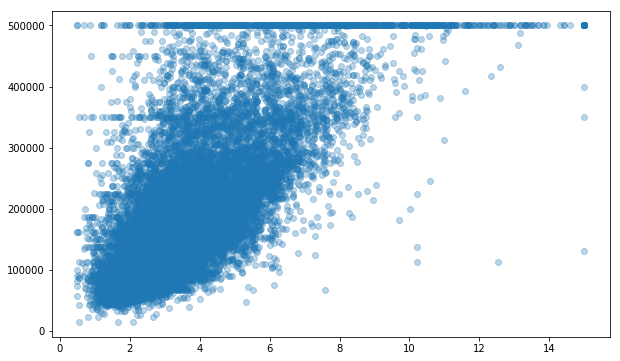

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(y=data['median_house_value'],x=data['median_income'],alpha=0.3)

In [33]:
data1=data.copy()

In [34]:
data1['rooms_per_household']=data1['total_rooms']/data1['households']
data1['bedrooms_per_room']=data1['total_bedrooms']/data1['total_rooms']
data1['population_per_household']=data1['population']/data1['households']

In [35]:
data1.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.89,37.29,38,1568,351.0,710,339,2.7042,<1H OCEAN,286600,4.625369,0.223852,2.094395


In [36]:
corr_matrix=data1.corr()

In [37]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [38]:
class FeaturesAdder(BaseEstimator,TransformerMixin):
    """This class adds new features in the dataset.
        Features added are : rooms_per_household, bedrooms_per_room, and population_per_household.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X['rooms_per_household']=X['total_rooms']/X['households']
        X['bedrooms_per_room']=X['total_bedrooms']/X['total_rooms']
        X['population_per_household']=X['population']/X['households']
        return X

In [39]:
#Get number of Null Values
def get_null_count(data):
    for i in data.columns:
        print(i,': ',len(data[data[i].isnull()][i]))

In [40]:
get_null_count(data)

longitude :  0
latitude :  0
housing_median_age :  0
total_rooms :  0
total_bedrooms :  158
population :  0
households :  0
median_income :  0
ocean_proximity :  0
median_house_value :  0


In [41]:
data_null=data[data['total_bedrooms'].isnull()]

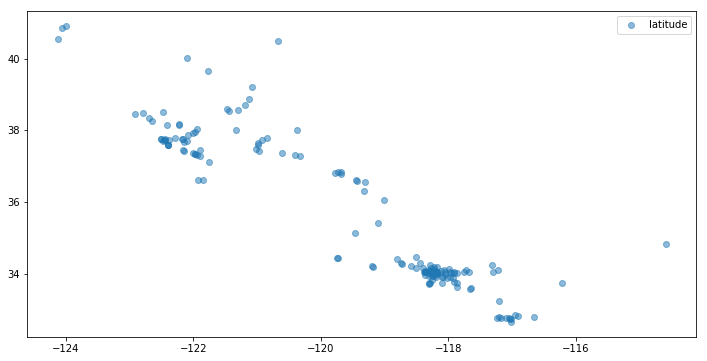

In [42]:
plt.figure(figsize=(12,6))
plt.scatter(x=data_null['longitude'],y=data_null['latitude'],alpha=0.5)
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266B1C60588>]],
      dtype=object)

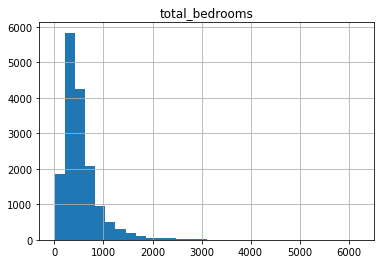

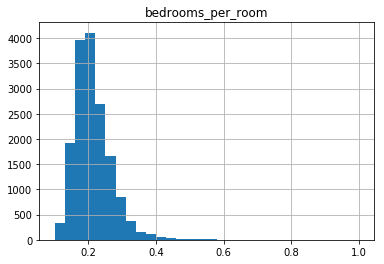

In [43]:
data1.hist(column='total_bedrooms',bins=30)
data1.hist(column='bedrooms_per_room',bins=30)

In [44]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

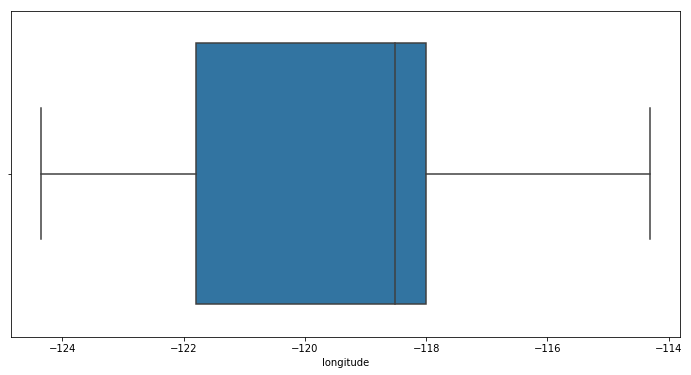

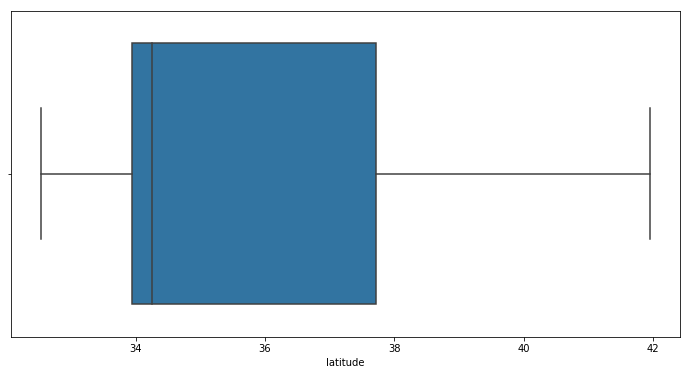

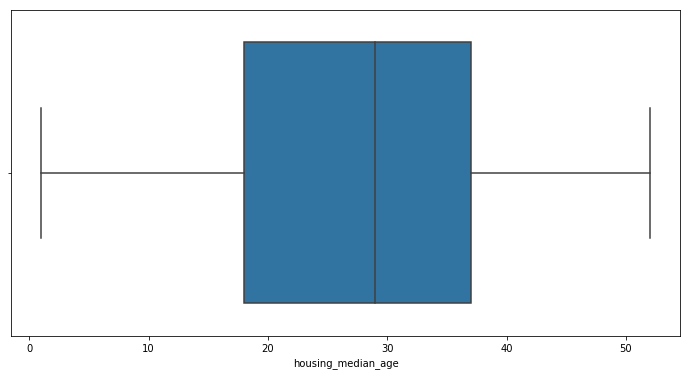

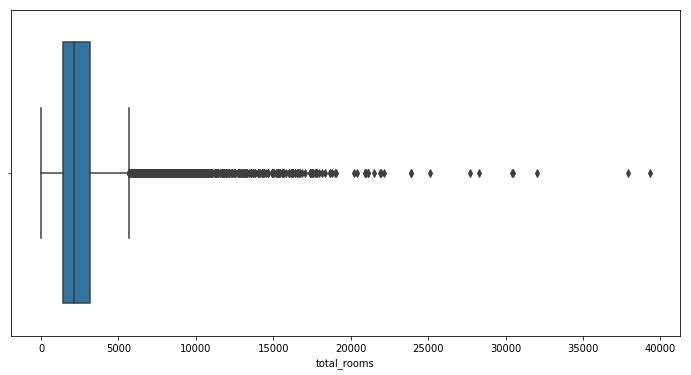

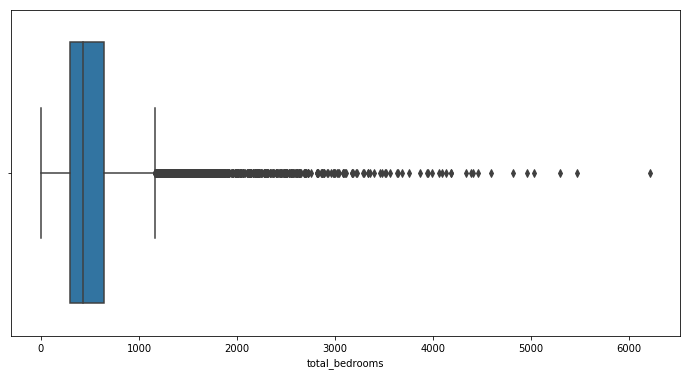

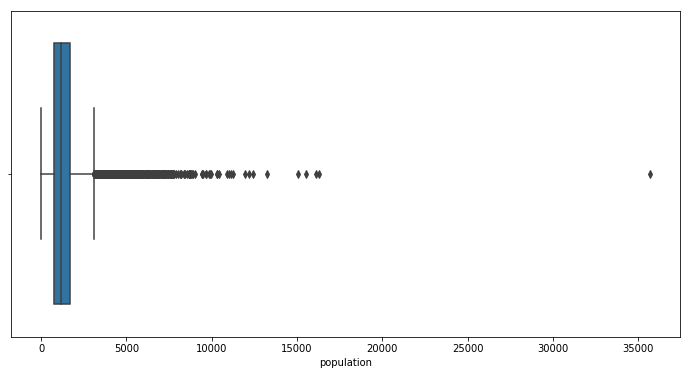

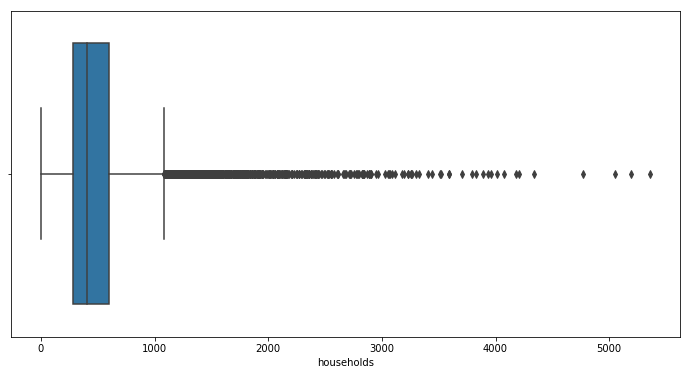

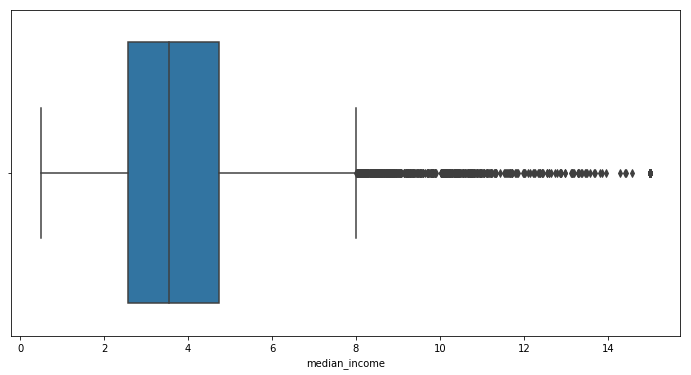

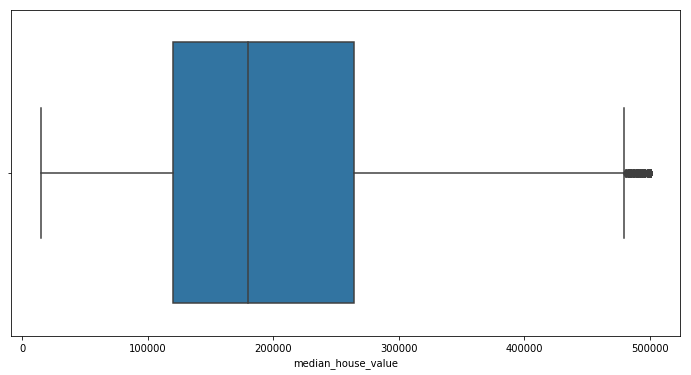

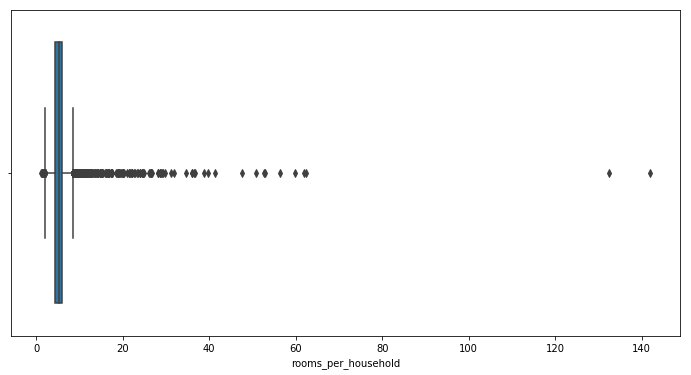

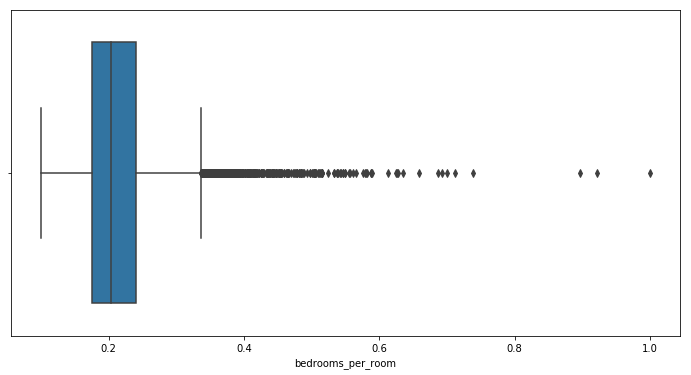

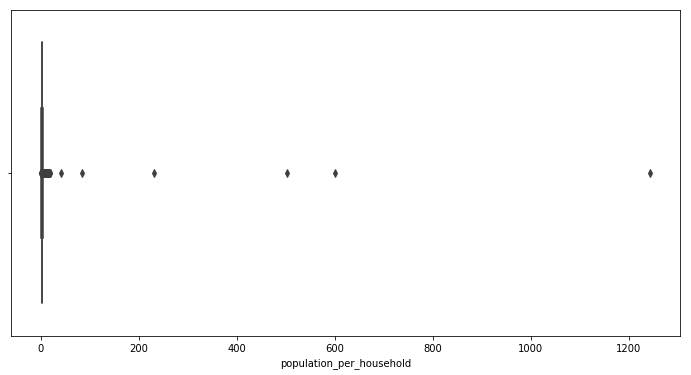

In [45]:
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=data1,ax=ax)

In [46]:
class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    Note: Outlier values are hard coded
    """
    def fit (self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X=X[(X['median_house_value']!=500001) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[X['median_income']<=11].reset_index(drop=True)
        X=X[(X['median_house_value']!=350000) | (X['median_income']>=1.5)].reset_index(drop=True)
        X=X[(X['median_house_value']!=450000) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[(X['median_house_value']>=350000) | (X['median_income']<=9.5)].reset_index(drop=True)
        X=X[X['population']<=9000]
        X=X[(X['population_per_household']>=1.15) & (X['population_per_household']<=6.5)]
        X=X[X['rooms_per_household']<20]
        X=X[X['bedrooms_per_room']<0.5].reset_index(drop=True)
        return X

In [47]:
data1=RemoveOutliers().fit_transform(data1)

In [48]:
data_labels=data1['median_house_value']
data1=data1.drop('median_house_value',axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266B33866A0>,
      dtype=object)

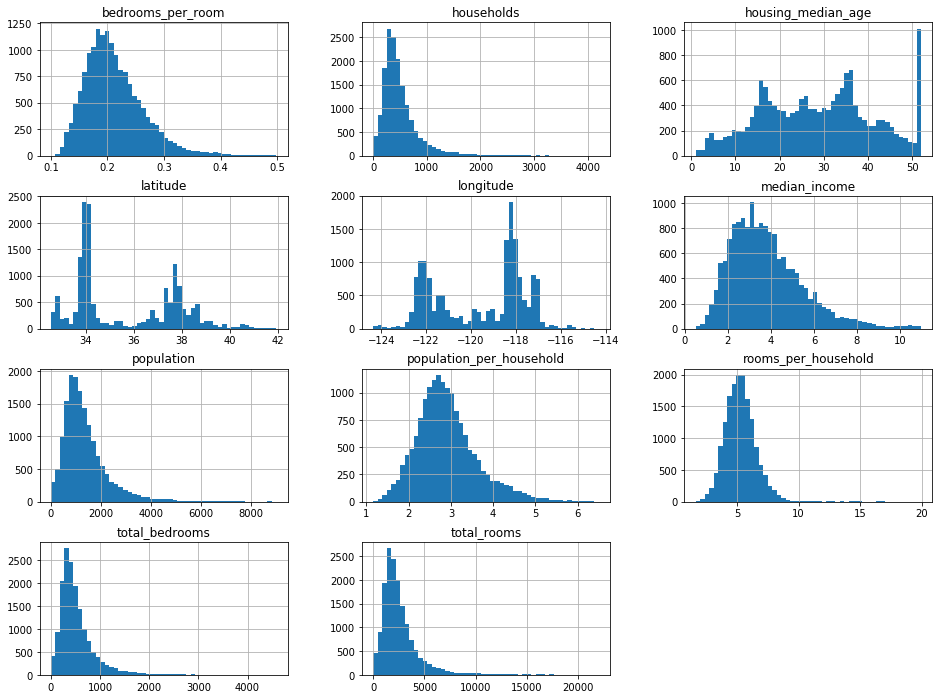

In [49]:
data1.hist(bins=50,figsize=(16,12))

In [50]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

In [51]:
skewness=[]
for i in num_features:
    skewness.append(data1[i].skew())
pd.DataFrame(data=skewness,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)

,skewness
total_rooms,2.902649
total_bedrooms,2.684070
households,2.629067
population,2.453927
rooms_per_household,2.168956
bedrooms_per_room,1.158469
median_income,1.051412
population_per_household,0.902046
latitude,0.462198
housing_median_age,0.061121


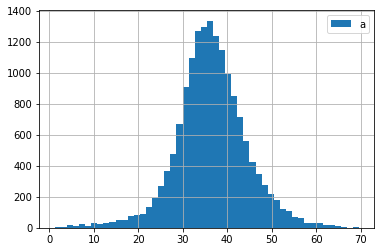

In [52]:
data1['households'].apply(lambda x: np.log1p(x)**2).hist(bins=50,label='a')
plt.legend()

In [53]:
class FeaturesTransformer(BaseEstimator,TransformerMixin):
    """This class trnsforms numberical featuress in the dataset.
    Note: Transformations are hard coded.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        import numpy as np
        from scipy.special import boxcox1p        
        X['total_rooms']=X['total_rooms'].apply(lambda x: boxcox1p(x,0.25))
        X['total_bedrooms']=X['total_bedrooms'].apply(lambda x: boxcox1p(x,0.25))
        X['households']=X['households'].apply(lambda x: boxcox1p(x,0.2))
        X['population']=X['population'].apply(lambda x: boxcox1p(x,0.3))
        X['rooms_per_household']=X['rooms_per_household'].apply(lambda x: np.log1p(x)**0.5)
        X['bedrooms_per_room']=X['bedrooms_per_room'].apply(lambda x: np.log1p(x)**0.25)
        X['median_income']=X['median_income'].apply(lambda x: np.log1p(x)**1.25)
        X['population_per_household']=X['population_per_household'].apply(lambda x: np.log1p(x)**1)
        return X

In [54]:
data1=FeaturesTransformer().fit_transform(data1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266B2A28048>,
      dtype=object)

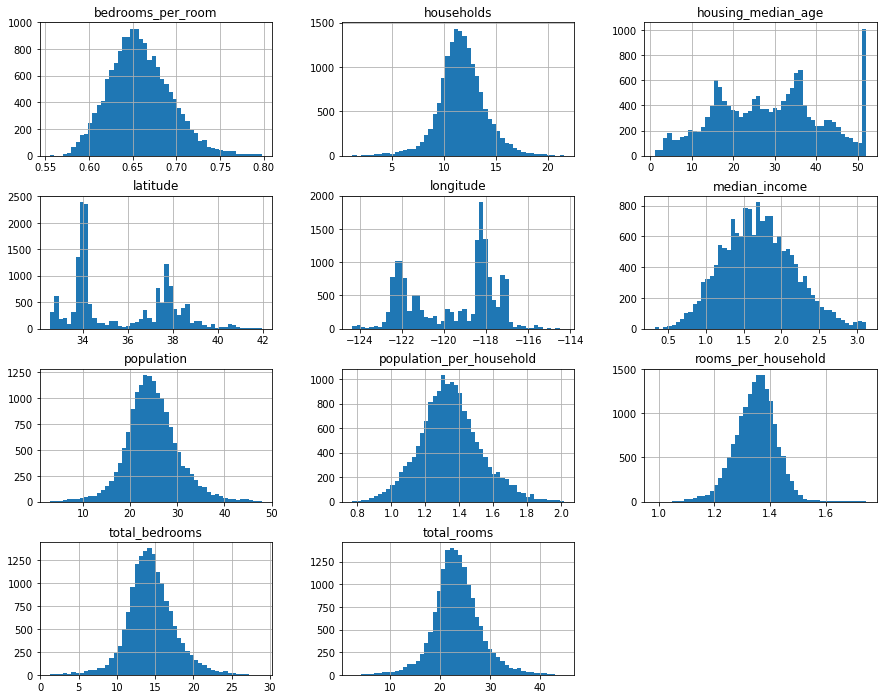

In [55]:
data1.hist(bins=50,figsize=(15,12))

In [56]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import Imputer,StandardScaler

In [57]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    """This class is a dataframe selector.
        Data members:
            features: A list of column_names you want in output dataframe
    """
    def __init__(self,features):
        self.features=features
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.features]

In [58]:
class GetDummies(BaseEstimator,TransformerMixin):
    """This class is used to get dummy columns from categorical columns."""
    def fit (self,X,y=None):
        return self
    def transform(self,X,y=None):
        #change ISLAND to NEAR BAY...as count of ISLAND is very low
        X[X=='ISLAND']='NEAR BAY'
        return (pd.get_dummies(X,drop_first=True))

In [59]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household','bedrooms_per_room', 'population_per_household']
cat_featues=['ocean_proximity']

In [60]:
num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_features)),
    ('imputer',Imputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

#Preparing categorical data
cat_pipeline=Pipeline([
    ('selector',DataFrameSelector(cat_featues)),
    ('get_dummies',GetDummies())
])

#Combining numerical and categorica data
data_cleaning_pipeline=FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
    
])

In [61]:
data1=data_cleaning_pipeline.fit_transform(data1)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\Anaconda3\lib\site-packages\pandas\core\frame.py:3160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [62]:
l=num_features.copy()
l.extend([0,1,2])

In [63]:
data1=pd.DataFrame(data1,columns=l)

In [64]:
data1.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,0,1,2
0,-1.154224,0.772567,0.746370,-0.475425,-0.369225,-0.743301,-0.314063,-0.611150,-0.449849,0.334068,-1.207634,0.0,0.0,0.0
1,-1.174180,0.660361,-1.171019,-1.491029,-1.797235,-1.693043,-1.732155,1.464804,0.622682,-1.106072,-0.204224,0.0,0.0,0.0


In [65]:
y=data_labels.copy()

In [66]:
label_scaler=StandardScaler()
data_labels=label_scaler.fit_transform(y.values.reshape(-1,1))

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [67]:
def get_vif(X):
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return pd.Series(index=X.columns,data=l).sort_values(ascending=False)
            
def remove_by_pvalue(X,y,pvalue=0.05):
    """Remove features with p-value more than 'pvalue'
    
    This function uses statsmodels.api.OLS model. Please add intercept to data externally.
    Input:
        X: Array or dataframe excluding predicted variable
        y: Series or list of predicted variable
        pvalue: int or float
    
    Note:
        X is changed inplace
    """
    import statsmodels.api as sm
    for i in range(len(X.columns)):
        regressor_OLS=sm.OLS(endog=y,exog=X).fit()
        s=regressor_OLS.pvalues.sort_values(ascending=False)
        if s.iloc[0]>pvalue:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],'P-value: ',s.iloc[0])
        
def remove_by_vif(X,vif=5):
    """Remove columns from X whose VIF is greater than supplied 'vif'
    Parameters:
        X:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF
    Note:
        This function changes X inplace
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
        
    for i in range(len(X.columns)):
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s=pd.Series(index=X.columns,data=l).sort_values(ascending=False)
        if s.iloc[0]>vif:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],', VIF: ',s.iloc[0])
        else:
            break

In [68]:
get_vif(data1)

total_bedrooms              558.923558
households                  389.655010
total_rooms                 287.321351
population                  141.389762
bedrooms_per_room            66.260643
rooms_per_household          50.549888
population_per_household     19.548814
latitude                     18.347840
longitude                    17.347168
median_income                 3.027807
0                             2.022556
1                             1.449785
housing_median_age            1.374288
2                             1.223067
dtype: float64

In [69]:
remove_by_vif(data1)

Removed:  total_bedrooms , VIF:  558.9235579608114
Removed:  households , VIF:  228.1741365426593
Removed:  total_rooms , VIF:  108.34813434774779
Removed:  latitude , VIF:  18.337136881413034
Removed:  bedrooms_per_room , VIF:  5.6188187978709845


In [70]:
remove_by_pvalue(data1,data_labels)

In [71]:
data1

,longitude,housing_median_age,population,median_income,rooms_per_household,population_per_household,0,1,2
0,-1.154224,0.746370,-0.743301,-0.611150,-0.449849,-1.207634,0.0,0.0,0.0
1,-1.174180,-1.171019,-1.693043,1.464804,0.622682,-0.204224,0.0,0.0,0.0
2,1.185638,0.187132,-0.375164,-0.492940,-0.825039,-1.331664,0.0,0.0,1.0
3,-0.016721,-0.292216,0.285178,-1.299468,0.057913,1.602935,1.0,0.0,0.0
4,0.492161,-0.931346,2.390008,-0.368150,-0.558206,0.282264,0.0,0.0,0.0
5,-0.695232,-0.372107,0.272099,-0.026846,-0.014846,-0.460816,1.0,0.0,0.0
6,0.537063,1.864848,-0.640087,2.211393,1.801396,-0.103112,0.0,0.0,0.0
7,1.165682,-0.212324,-0.375164,1.282074,0.219370,-0.530744,1.0,0.0,0.0
8,0.656800,1.465391,0.734568,-1.355285,-0.792829,1.854672,0.0,0.0,0.0
9,-0.864859,-0.372107,1.380581,-0.540371,-0.358095,0.367265,1.0,0.0,0.0
